In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("C:/Users/MRIGESHA/Desktop/EXCELR/Assignments/Clustering/crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
# Remove two columns as index base
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [7]:
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
# Normalization

def Norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)
   

In [10]:
df_norm = Norm_func(df.iloc[:,:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


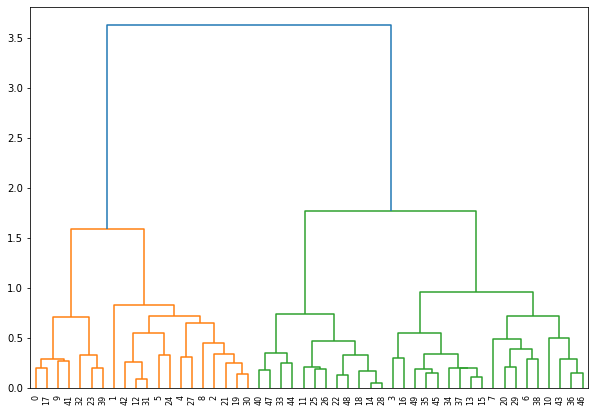

In [12]:
# Create Dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'ward'))

In [13]:
# create Clusters
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

In [14]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
df_hc = df.copy()
df_hc['cluster_id'] = y_hc
df_hc

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [16]:
df_hc.iloc[:,:].groupby(df_hc.cluster_id).mean()

,Murder,Assault,UrbanPop,Rape,cluster_id
cluster_id,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.0
1,10.000000,263.000000,48.000000,44.500000,1.0


In [18]:
# K Means
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

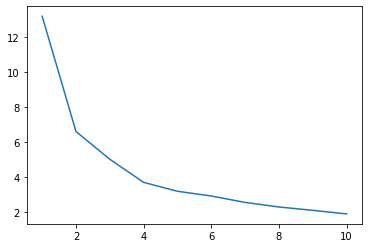

In [19]:
# create Elbow Curve to identify No. of K
# inertia_ -- This will calculare WCSS(Withib Cluster sum of square of distance)    
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)

In [24]:
# create clusters
model = KMeans(n_clusters = 4)
model.fit(df_norm)
model.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [25]:
df_kmeans = df.copy()

In [26]:
md = pd.Series(model.labels_)
df_kmeans['Cluster'] = md

In [27]:
df_kmeans

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [28]:
df_kmeans.iloc[:,1:].groupby(df_kmeans.Cluster).mean()

,Assault,UrbanPop,Rape,Cluster
Cluster,,,,
0,78.538462,52.076923,12.176923,0
1,264.000000,76.500000,33.608333,1
2,141.176471,73.647059,19.335294,2
3,243.625000,53.750000,21.412500,3


In [29]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_norm)

DBSCAN()

In [38]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [39]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
df_dbscan = df.copy()
df_dbscan['Cluster'] = cl
df_dbscan

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [40]:
df_dbscan['Cluster'] == -1


0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
Name: Cluster, dtype: bool

In [41]:
df_dbscan_drop_index = df_dbscan[df_dbscan['Cluster'] == -1].index

In [42]:
df_dbscan.drop(df_dbscan_drop_index, inplace = True)

In [43]:
df_dbscan.iloc[:,1:].groupby(df_dbscan.Cluster).mean()

,Assault,UrbanPop,Rape,Cluster
Cluster,,,,
0,168.877551,65.897959,20.757143,0.0
